# 2. 突触模型

根据spike产生的东西而产生的膜电位变化通过**轴索**传播, 通过被称为突触的结构传播到下一神经元。

突触传递机制有两种：**化学突触(chemical synapse)**以及**Gap junction**的**电突触(electrical synapse)**。

在中枢神经系统中，这两种突触都存在，但本文只讨论化学突触。
在化学突触的情况下，会发生以下过程：突触前膜释放神经递质，神经递质与突触后膜上的受体结合，以及通过打开离子通道产生**突触后电流（PSC）** 。

因此，突触前细胞的尖峰序列不会直接传输到下一个神经元，而是经过某种时间过滤(这样的过滤器也被称为**synaptic filter**) 。

本章描述了**突触前细胞的发射影响突触后细胞膜电位的过程模型**。

##  2.1 Current-based vs Conductance-based 的突触

基于电流的突触是指输入电流发生变化的模型，而基于电导的突触是指离子通道的电导（电流流动的难易程度）发生变化的模型。

例如 $LIF$方程式

$$τ_m\frac{dV_m(t)}{dt} = −(V_m(t) − V_{rest}) + R_mI_{syn}(t)$$

$I_{syn}(t)$为突触电流输入。在两种突触模型下是不同的。

### 2.1.1 Current-based 突触

Current-based突触模型是电流的变化模型。

$$I_{syn}(t)=J_{syn}s_{syn}(t)$$

$J_{syn}$为 **synaptic efficacy（突触效率），单位pA**。

$s_{syn}(t)$为 **synaptic kinetics （突触动力学）**

例如$s_{syn}(t)$可为:

$$s_{syn}(t)=\frac{t}{\tau_s}exp(1-\frac{t}{\tau_s})$$

如果我们关注的是前部细胞，突触动态就是神经递质的释放量；如果我们关注的是后部细胞，突触动态就是神经递质的结合量和离子通道的开放率。

### 2.1.2 Conductance-based的突触

基于电导的突触是离子通道电导发生变化的模型。

Hodgkin-Huxley模型就是一种基于电导的模型。这种模型更符合生理学原理。

对于突触输入，$I_{syn}(t)$为:

$$I_{syn}(t)=g_{syn}s_{syn}\cdot (V_{syn}-V_m(t))$$

其中$g_{syn}s_{syn}$为Conductance的变化

$g_{syn}$为突触最大电导，单位$nS$

$V_{syn}$为突触平衡电位，单位$mV$。与$J_{syn}$相同，为突触上受体总类决定的常数。


**s_{syn}(t)\le 0**时， Current-based模型中的$j_{syn}$可以取正/负值。但$g_{syn}$仅能取正值。

基于电导的模型下，决定兴奋或抑制的是平衡电位$V_{syn}$

**兴奋性突触的平衡电位较高，抑制性突触的平衡电位较低**，因此膜电位减去电位的符号分别为正和负。

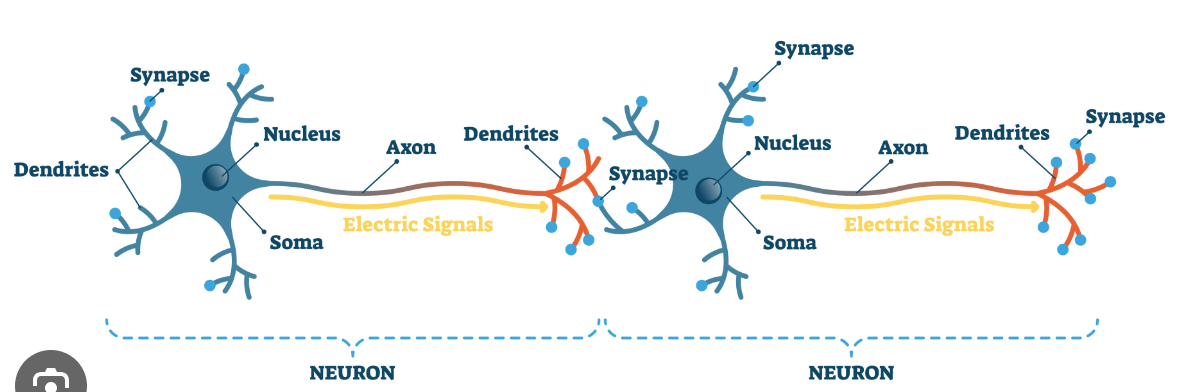

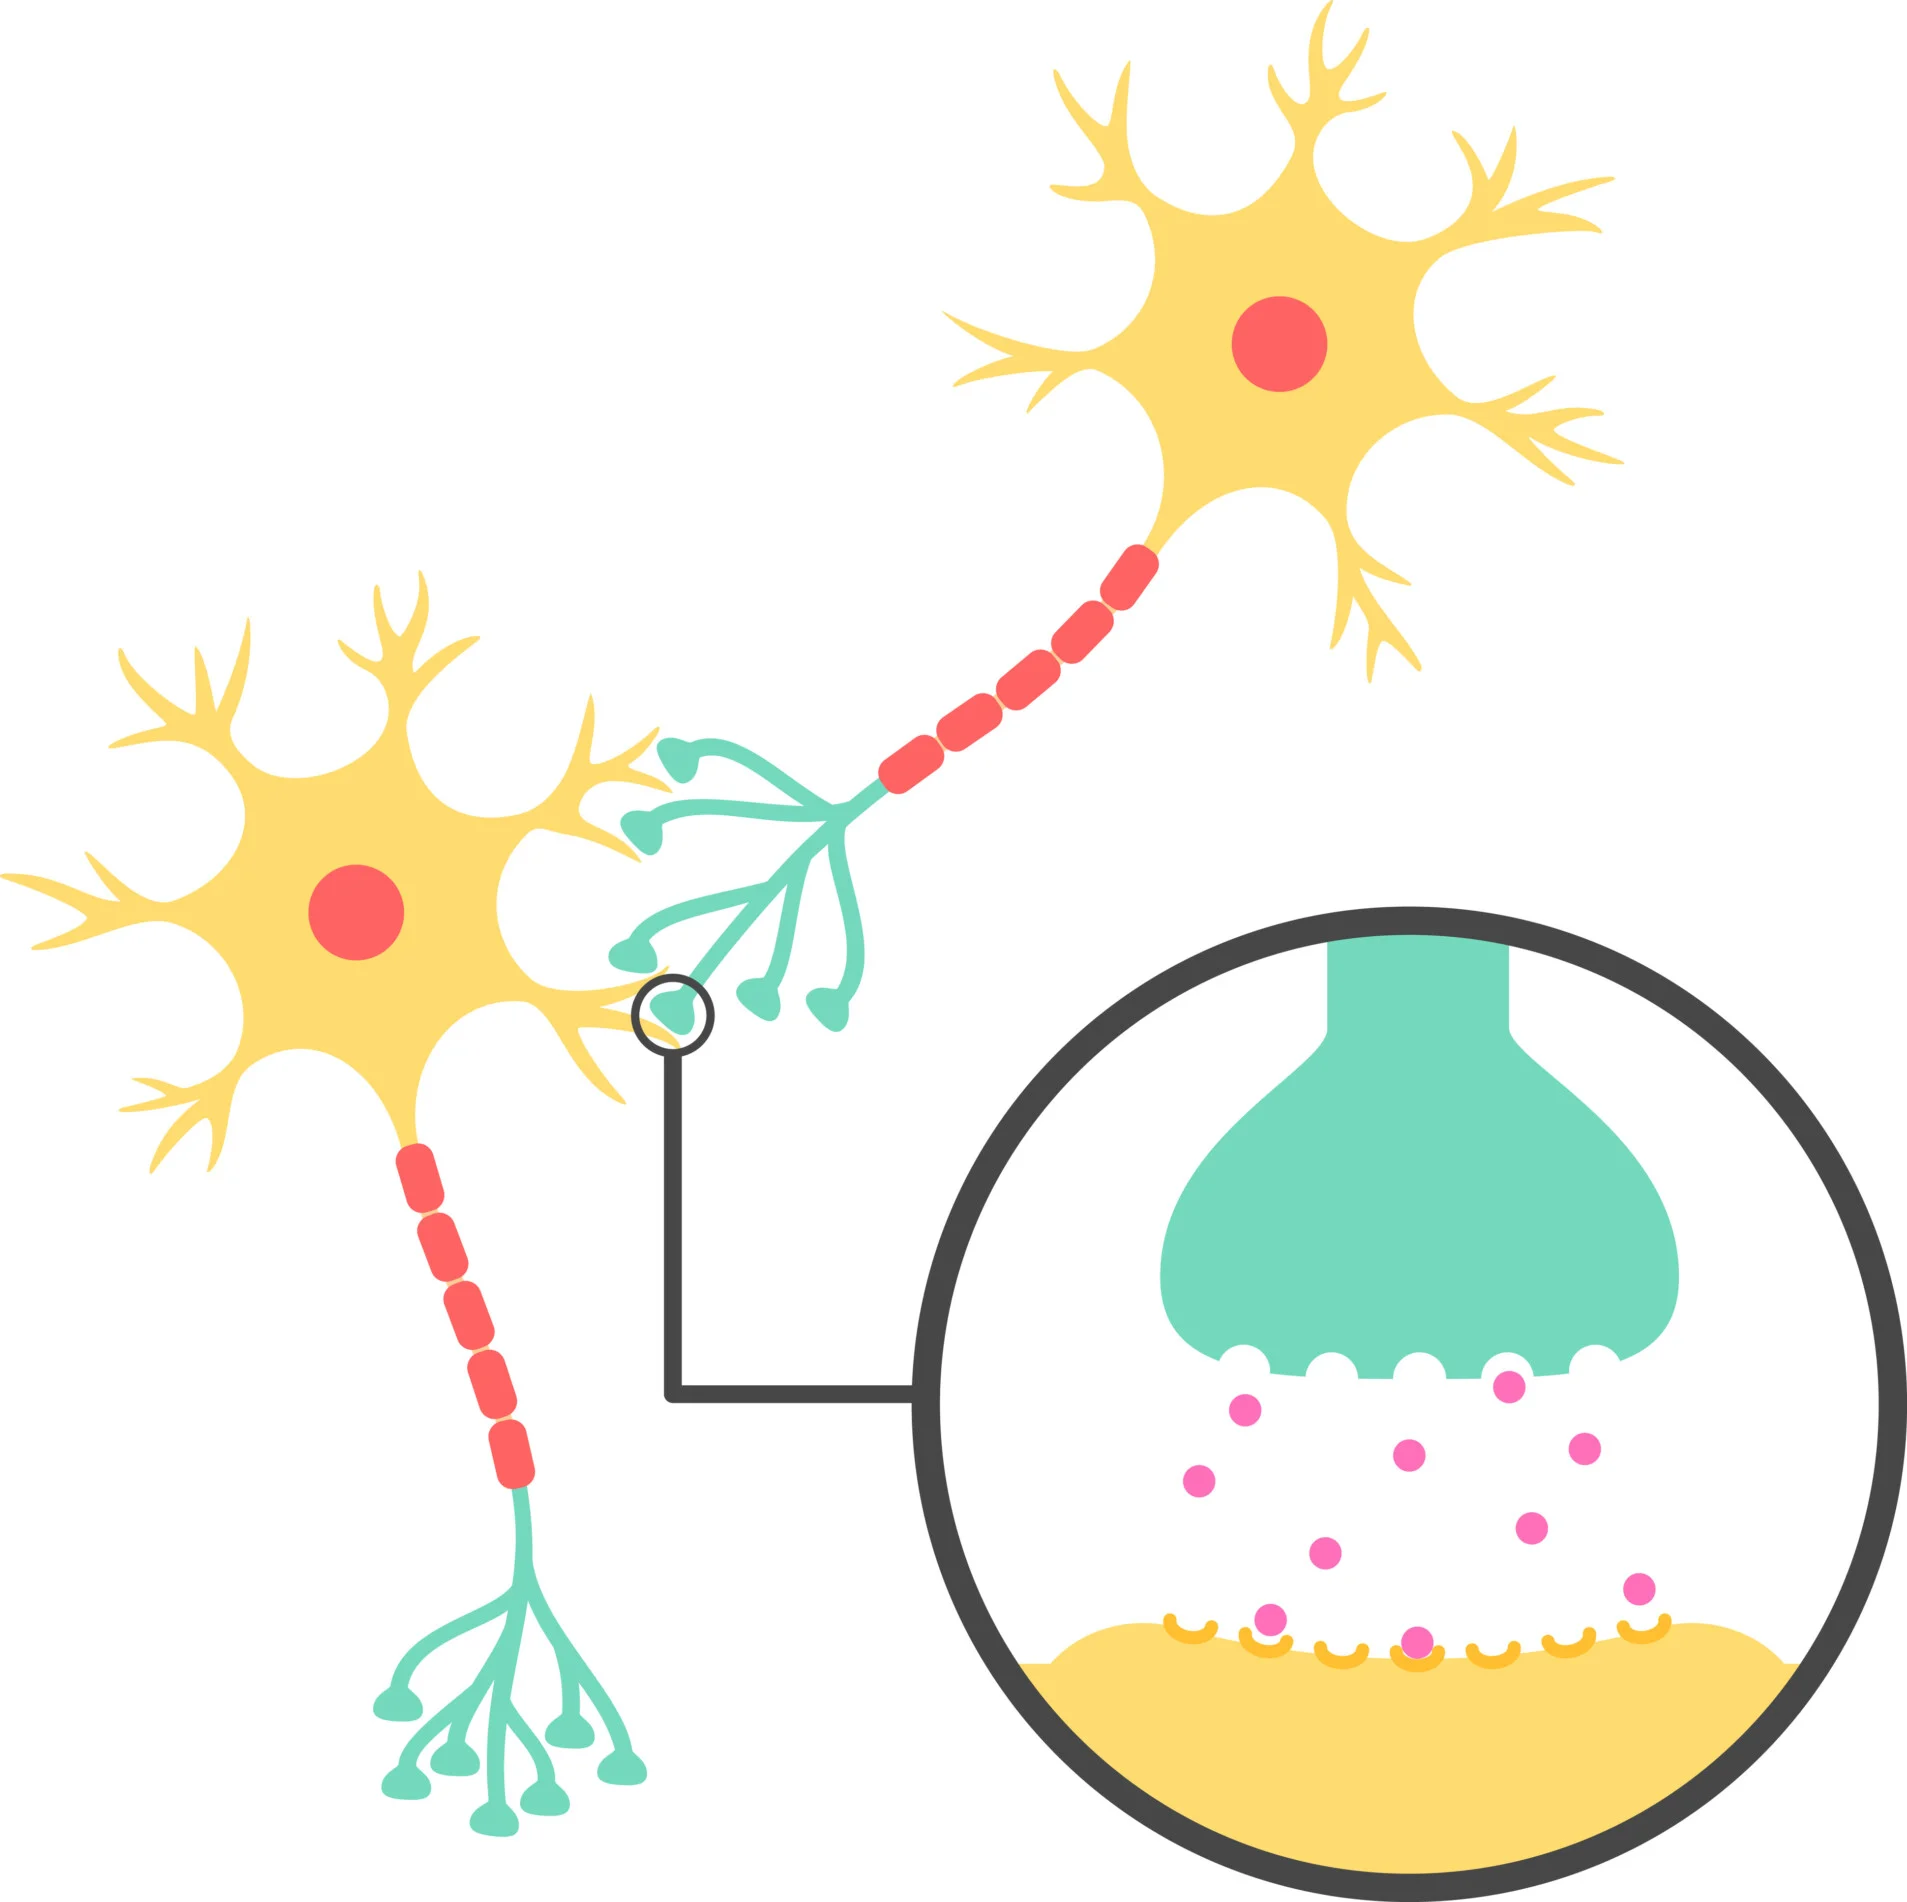

Neurons do not touch each other, but where the neuron does come close to another neuron, a synapse is formed between the two.  This is how neurons communicate with each other.
神经元不会相互接触，但是当神经元靠近另一个神经元时，两者之间就会形成突触。这就是神经元相互交流的方式。

Neurons do not touch each other, but where the neuron does come close to another neuron, a synapse is formed between the two.  This is how neurons communicate with each other.
神经元不会相互接触，但是当神经元靠近另一个神经元时，两者之间就会形成突触。这就是神经元相互交流的方式。

When a nerve impulse has triggered the release of these neurotransmitters from the terminal buttons, these chemicals are then released into the synaptic cleft and are then taken up by receptors on the next cell.
当神经冲动触发这些神经递质从末端按钮释放时，这些化学物质就会被释放到突触间隙中，然后被下一个细胞上的受体吸收。

[ref: https://www.simplypsychology.org/synapse.html]

兴奋性突触興是指促进后细胞的活动电位发生的突触。

兴奋性突触 (excitatory synapse) 是指能使突触后神经元 (postsynaptic neuron) 产生兴奋作用的神经细胞间的连接--神经突触 (synapse)。
[ref: https://baike.baidu.com/item/%E5%85%B4%E5%A5%8B%E6%80%A7%E7%AA%81%E8%A7%A6/9180524?fr=ge_ala]

In [2]:
class ConductanceBasedLIF:
    def __init__(self, N, dt=1e-4, tref=5e-3, tc_m=1e-2, vrest=-60, vreset=-60, vthr=-50, vpeak=20, e_exc=0, e_inh=-100):
        self.N = N
        self.dt = dt
        self.tref = tref
        self.tc_m = tc_m
        self.vrest = vrest
        self.vreset = vreset
        self.vthr = vthr
        self.vpeak = vpeak
        self.e_exc = e_exc # 兴奋性突触的平衡電位
        self.e_inh = e_inh # 抑制性突触的平衡電位
        self.v = self.vreset*np.ones(N)
        self.v_ = None
        self.tlast = 0
        self.tcount = 0

    def initialize_states(self, random_state=False):
        if random_state:
            self.v = self.vreset + np.random.rand(self.N)*(self.vthr-self.vreset)
        else:
            self.v = self.vreset*np.ones(self.N)
        self.tlast = 0
        self.tcount = 0
                
    # 興奮性突触の平衡電位 e_exeと抑制性突触的平衡電位 e_inh 
    def __call__(self, g_exc, g_inh):
        I_synExc = g_exc*(self.e_exc - self.v) # 兴奋性输入
        I_synInh = g_inh*(self.e_inh - self.v) # 抑制性输入
        dv = (self.vrest - self.v + I_synExc + I_synInh) / self.tc_m
        v = self.v+((self.dt*self.tcount)>(self.tlast+self.tref))*dv*self.dt
                
        s = 1*(v>=self.vthr) # 发火时 1, 其他情况输出0
                
        self.tlast = self.tlast*(1-s) + self.dt*self.tcount*s # 発火時刻更新
        v = v*(1-s) + self.vpeak*s # 閾値を超えると膜電位を vpeak にする
        self.v_ = v # 発火時の電位も含めて記録するための変数
        self.v = v*(1-s) + self.vreset*s # 発火時に膜電位をリセット
        self.tcount += 1
                
        return s

## 2.2 Exponential synapse model

存在许多突触模型。SNN中常使用的是Exponential synapse model。

该模型无视生理过程。再现突触后电位的举动。

Exponential synapse model存在两种类型：**Single exponential model**以及 **Double exponential model**


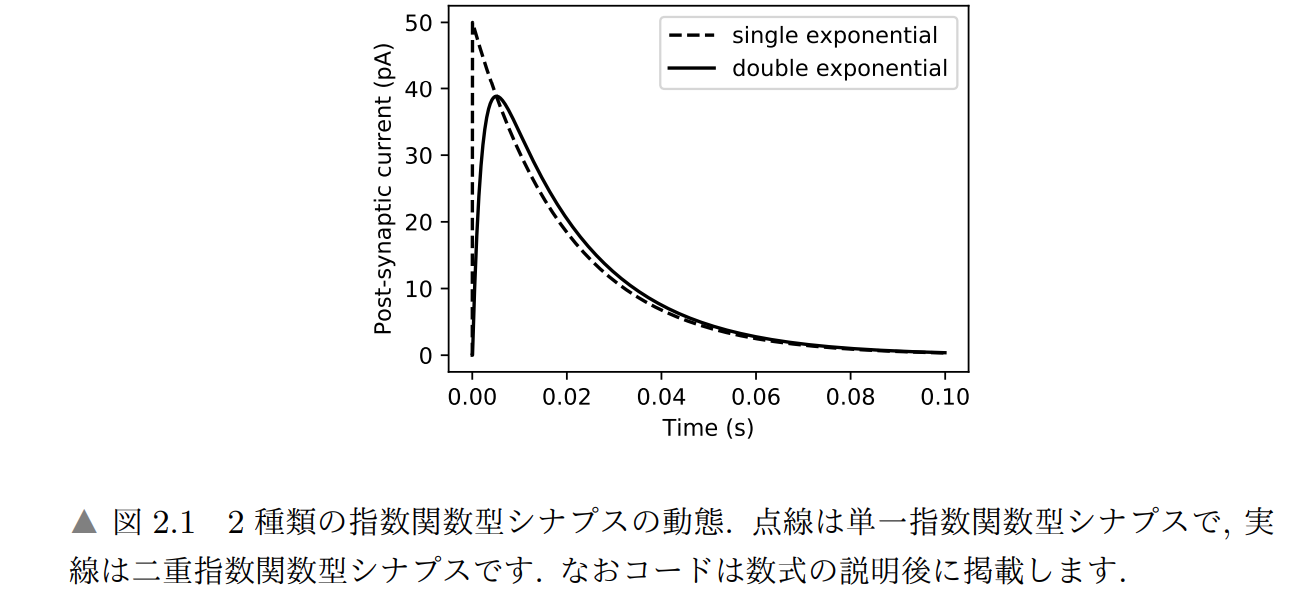

**图 2.1** 显示了两种模型在尖峰发生后突触后电流在 t = 0 时的变化。然而，实际的突触后电流是两个模型的总和乘以突触强度。(突触强度将在下文中解释)。

突触强度是一个方便的术语，实际上由多个因素决定，包括神经递质的类型及其受体的数量。这种突触强度也被称为突触权重。这或多或少是机器学习的一种表达方式。因此，我们在本书中也使用权重这一术语。

### 2.2.1  Single exponential model

从突触前神经元发生spike后，突触后电流的变化大概以指数函数减少，这样的模型被称为 **单一指数模型**，式子如下

$$f(t)=\frac{1}{\tau_s}exp(-\frac{t}{\tau_s})$$

该函数作为时间filter, 将过去所有spike取总和:

$$r(t)=\sum_{t_k<t}f(t-t_k)$$

此处的$r(t)$即为前面所述的$s_{syn}$, $t_k$为t-th spike发生的时刻。

$t_k<t$意味着对t时刻之前的所有spike取和。

若将$*$作为卷积演算子，突触前细胞的spike列为$S(t)=\sum_{t_k<t}\delta(t-t_k)$

此时，$r(t)=f*S(t)$


上述的方法必须对神经发火的时刻进行记录，对于各个时间，记录所有spike和。在实现中使用下列等价的微分方程式。

$$\frac{dr}{dt}=-\frac{r}{\tau_s}+\frac{1}{\tau_s}\sum_{t_k<t} \delta(t-t_k)$$

这里的$\tau_s$为突触时间常数(synaptic time constant), 同时$\delta(\cdot)$为Diracのdelta 関数, $\delta(0)=1$

使用Euler微分化之后


$$r(t+\Delta t)=(1-\frac{\Delta}{\tau_s})r(t)+\frac{1}{\tau_s}\delta_{t,t_k}$$

$\delta_{t,t_k}$为Kronecker の delta 関数。$t=t_k$时为1, 之外为0。

此外也有使用$exp(-\Delta t/\tau_d)$代替衰减度$exp(-\Delta t/\tau_d)$的情况。

### 2.2.2 Double exponential model


Double exponential model将突触后电位的上升也考虑了进去。

$t=0$时突触前细胞发火时，突触后电流的时间变化函数为

$$f(t)=A[exp(-\frac{t}{\tau_d})-exp(-\frac{t}{\tau_r})]$$

$τ_r$为上升时间常数。

$\tau_d$为衰减时间常数。

**两者均决定神经传递物质的减少速度**

$A$为规格化常数。其使f最大值为1。

$A=\frac{\tau_d}{\tau_d-\tau_r}\cdot (\frac{\tau_r}{\tau_d})^{\frac{\tau_r}{\tau_r-\tau_d}}$

$\tau=tau_r=\tau_d$时被称为$\alpha$ function/alpha synapse

$\alpha(t)=\frac{t}{\tau}exp(1-\frac{t}{\tau})$


这里使用$h$将微分方程式导出：

$\frac{dr}{dt}=-\frac{r}{r_d}+h$

$\frac{dh}{dt}=-\frac{h}{\tau_r}+\frac{1}{\tau_r\tau_d}\sum_{t_k<t}\delta(t-t_k)$


使用欧拉差分法表现之后形式如下：

$$r(t+\Delta t) = (1-\frac{\Delta}{\tau_d})r(t)+h(t)\cdot \Delta t$$

$$h(t+\Delta t) = (1-\frac{\Delta}{\tau_r})h(t)+\frac{1}{\tau_r\tau_d}\delta_{t,t_{j\;k}}$$


### 2.2.3 指数函数型突触实现

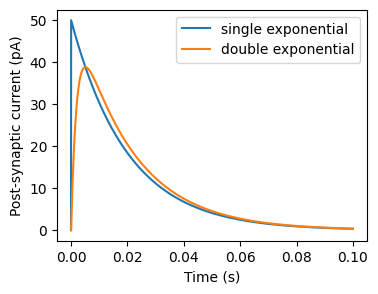

In [3]:
import numpy as np
import matplotlib.pyplot as plt
dt = 5e-5 # タイムステップ (sec)
td = 2e-2 # synaptic decay time (sec)
tr = 2e-3 # synaptic rise time (sec)
T = 0.1 # シミュレーション時間 (sec)
nt = round(T/dt) # シミュレーションの総ステップ
# 単一指数関数型シナプス
r = 0 # 初期値
single_r = [] # 記録用配列
for t in range(nt):
    spike = 1 if t == 0 else 0
    single_r.append(r)
    r = r*(1-dt/td) + spike/td
    #r = r*np.exp(-dt/td) + spike/td

# 二重指数関数型シナプス
r = 0; hr = 0 # 初期値
double_r = [] # 記録用配列
for t in range(nt):
    spike = 1 if t == 0 else 0
    double_r.append(r)
    r = r*(1-dt/tr) + hr*dt
    hr = hr*(1-dt/td) + spike/(tr*td)
    #r = r*np.exp(-dt/tr) + hr*dt
    #hr = hr*np.exp(-dt/td) + spike/(tr*td)

time = np.arange(nt)*dt
plt.figure(figsize=(4, 3))
plt.plot(time, np.array(single_r), label="single exponential")
plt.plot(time, np.array(double_r), label="double exponential")
plt.xlabel('Time (s)'); plt.ylabel('Post-synaptic current (pA)')
plt.legend()
plt.show()

### 2.2.4 指数函数型突触Class

In [4]:
class SingleExponentialSynapse:
    def __init__(self, N, dt=1e-4, td=5e-3):
        self.N = N
        self.dt = dt
        self.td = td
        self.r = np.zeros(N)
    def initialize_states(self):
        self.r = np.zeros(self.N)
    def __call__(self, spike):
        r = self.r*(1-self.dt/self.td) + spike/self.td
        self.r = r
        return r

class DoubleExponentialSynapse:
    def __init__(self, N, dt=1e-4, td=1e-2, tr=5e-3):
        self.N = N
        self.dt = dt
        self.td = td
        self.tr = tr
        self.r = np.zeros(N)
        self.hr = np.zeros(N)

    def initialize_states(self):
        self.r = np.zeros(self.N)
        self.hr = np.zeros(self.N)

    def __call__(self, spike):
        r = self.r*(1-self.dt/self.tr) + self.hr*self.dt
        hr = self.hr*(1-self.dt/self.td) + spike/(self.tr*self.td)
        self.r = r
        self.hr = hr
        return r


## 2.3 Kinetic model

除了指数突触模型之外，还有一种动力学模型（Destexhe et al.） 这两个模型的行为几乎相同，但方程结构略有不同。动力学模型的表达式类似于 HH 模型中的门变量表达式。在该模型中，有两种状态：开放（Open）和关闭（Close）通道以及神经递质的释放状态（T）。让 α 表示从关闭到打开的反应速率，β 表示从打开到关闭的反应速率。代表这些状态转换的方程如下

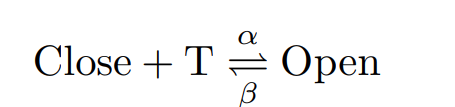

将突触动态设为$r$, 则

$$\frac{dr}{dt}=\alpha T(1-r)-\beta r$$

假设突触前细胞发生突触时，T 会脉冲式地增加 1。如果 α = 2000 和 β = 200，突触动态如图 2.2 所示。显示代码如下

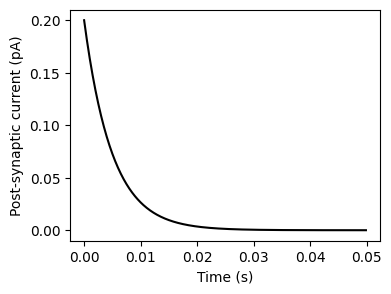

In [5]:
dt = 1e-4; T = 0.05; nt = round(T/dt)
alpha = 1/5e-4; beta = 1/5e-3

r = 0; single_r = [] #記録用配列
for t in range(nt):
    spike = 1 if t == 0 else 0
    r += (alpha*spike*(1-r) - beta*r)*dt
    single_r.append(r)

time = np.arange(nt)*dt
plt.figure(figsize=(4, 3))
plt.plot(time, np.array(single_r), color="k")
plt.xlabel('Time (s)'); plt.ylabel('Post-synaptic current (pA)')
plt.show()

## 2.4 突触输入的权重赋予

Current-base:

$$\bold I_{syn}(t)=W\bold s_{syn}$$

Conductance-based:

$$\bold I_{syn}(t)=(V_{syn}-\bold V_m(t))\odot W\bold s_{syn}$$

其中$\odot$为Hadamard积。


$N_{pre}$: 突触前细胞个数

$N_{post}$: 突触后细胞个数

$s_{syn}\in \mathbb R^{N_{pre}}$: 注目于突触前细胞的突触动态。

$\bold I_{syn}\in \mathbb R^{N_{post}}$

强度结合矩阵:$W\in \mathbb R^{N_{post}\times N_{pre}}$

$\bold V_m\in \mathbb R^{N_{post}}$: 后细胞膜电位

$s_{syn}'\in \mathbb R^{N_{post}}$: 注目于突触后过程的突触动态。

$\delta_{t,t_{spike}}\in \mathbb R^{N_{pre}}$

$s_{syn}$为$\delta_{t,t_{spike}}$的函数: $s_{syn} = f(\delta_{t,t_{spike}})$


Current-base:

$$\bold I_{syn}(t)=\bold s'_{syn}(W\bold \delta_{t,t_{spike}})$$

Conductance-based:

$$\bold I_{syn}(t)=(V_{syn}-\bold V_m(t))\odot \bold s'_{syn}(W\bold \delta_{t,t_{spike}})$$



【专栏】
神经回路的通用模拟器：

[1] NEURON (http://www.neuron.yale.edu/neuron/)

[2] GENESIS  (GEneral NEural SImulation System, http://genesis-sim.org)

[3] NEST (The NEural Simulation Tool; http://www.nest-simulator.org)

[4] BRIAN  (http://briansimulator.org/)

[5] PyNN (https://neuralensemble.org/PyNN/)

[6] SpykeTorch (https://github.com/miladmozafari/SpykeTorch)

[7] BindsNET (https://github.com/Hananel-Hazan/bindsnet)